<a href="https://colab.research.google.com/github/leantechio/tensorflowtutorial/blob/master/Tensorflow_tutorial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install --upgrade tensorflow-gpu


     |████████████████████████████████| 380.8MB 46kB/s 
     |████████████████████████████████| 450kB 40.1MB/s 
     |████████████████████████████████| 3.8MB 44.2MB/s 
     |████████████████████████████████| 81kB 9.0MB/s 
ERROR: tensorflow 1.15.0 has requirement tensorboard<1.16.0,>=1.15.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 1.15.0 has requirement tensorflow-estimator==1.15.1, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.15.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement google-auth~=1.4.0, but you'll have google-auth 1.10.0 which is incompatible.
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: google-auth 1.4.2
    Uninstalling google-auth-1.4.2:
      Successfully uninstalled goog

In [3]:
! pip install scikit-image

In [0]:
import tensorflow as tf
import os
import skimage
import numpy as np
import matplotlib.pyplot as plt

In [5]:
print(('Your TensorFlow version: {0}').format(tf.__version__))

Your TensorFlow version: 2.0.0


Am i running eager execution or not?

In [6]:
if(tf.executing_eagerly()):
    print('Eager execution is enabled (running operations immediately)\n')
    print(('Turn eager execution off by running: \n{0}\n{1}').format('' \
        'from tensorflow.python.framework.ops import disable_eager_execution', \
        'disable_eager_execution()'))
else:
    print('You are not running eager execution. TensorFlow version >= 2.0.0' \
          'has eager execution enabled by default.')
    print(('Turn on eager execution by running: \n\n{0}\n\nOr upgrade '\
           'your tensorflow version by running:\n\n{1}').format(
           'tf.compat.v1.enable_eager_execution()',
           '!pip install --upgrade tensorflow\n' \
           '!pip install --upgrade tensorflow-gpu'))

Eager execution is enabled (running operations immediately)

Turn eager execution off by running: 
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()


In [7]:
# Initialize two constants
x1 = tf.constant([1,2,3,4])
x2 = tf.constant([5,6,7,8])

# Multiply
result = tf.multiply(x1, x2)

# Print the result
print(result)

tf.Tensor([ 5 12 21 32], shape=(4,), dtype=int32)


In [8]:
result

<tf.Tensor: id=2, shape=(4,), dtype=int32, numpy=array([ 5, 12, 21, 32], dtype=int32)>

In [10]:
! git clone "https://github.com/leantechio/tensorflowtutorial.git"

Cloning into 'tensorflowtutorial'...
remote: Enumerating objects: 7344, done.
remote: Total 7344 (delta 0), reused 0 (delta 0), pack-reused 7344
Receiving objects: 100% (7344/7344), 245.49 MiB | 13.12 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Checking out files: 100% (7225/7225), done.


In [0]:
! ls

In [0]:
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) 
                   if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        file_names = [os.path.join(label_directory, f) 
                      for f in os.listdir(label_directory) 
                      if f.endswith(".ppm")]
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    return images, labels

ROOT_PATH = "/content"
train_data_directory = os.path.join(ROOT_PATH, "tensorflowtutorial/Training")
test_data_directory = os.path.join(ROOT_PATH, "tensorflowtutorial/Testing")

images, labels = load_data(train_data_directory)

In [12]:
# Print the `images` dimensions
print(np.array(images).ndim)

# Print the number of `images`'s elements
print(np.array(images).size)

# Print the first instance of `images`
images[0]

1
4575


Array([[[213, 255, 246],
        [207, 197, 165],
        [114, 104,  76],
        ...,
        [ 82,  90,  82],
        [ 91,  96,  88],
        [ 99,  99,  92]],

       [[197, 242, 223],
        [200, 189, 155],
        [119, 107,  78],
        ...,
        [ 90, 113, 104],
        [ 98, 115, 107],
        [104, 112, 105]],

       [[176, 219, 196],
        [161, 152, 116],
        [ 98,  87,  56],
        ...,
        [ 88, 115, 109],
        [ 86, 107, 101],
        [ 80,  95,  89]],

       ...,

       [[ 34,  46,  43],
        [ 34,  44,  43],
        [ 33,  42,  40],
        ...,
        [ 61,  61,  54],
        [ 58,  59,  50],
        [ 54,  56,  43]],

       [[ 37,  48,  43],
        [ 36,  47,  42],
        [ 36,  45,  40],
        ...,
        [ 62,  64,  57],
        [ 59,  61,  52],
        [ 56,  57,  45]],

       [[ 46,  58,  57],
        [ 49,  64,  60],
        [ 50,  63,  59],
        ...,
        [ 58,  68,  59],
        [ 65,  68,  59],
        [ 69,  65,  55]]

In [13]:
# Print the `labels` dimensions
print(np.array(labels).ndim)

# Print the number of `labels`'s elements
print(np.array(labels).size)

# Count the number of labels
print(len(set(labels)))


1
4575
62


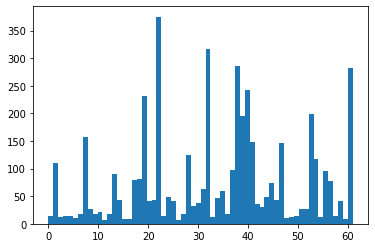

In [14]:
# Import the `pyplot` module
import matplotlib.pyplot as plt 

# Make a histogram with 62 bins of the `labels` data
plt.hist(labels, 62)

# Show the plot
plt.show()

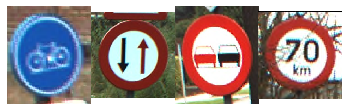

In [15]:
# Determine the (random) indexes of the images that you want to see 
traffic_signs = [300, 2250, 3650, 4000]

# Fill out the subplots with the random images that you defined 
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0)

plt.show()

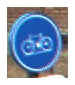

shape: (71, 61, 3), min: 5, max: 255


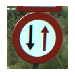

shape: (158, 154, 3), min: 0, max: 255


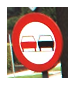

shape: (142, 122, 3), min: 0, max: 255


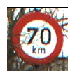

shape: (91, 87, 3), min: 0, max: 255


In [16]:
# Fill out the subplots with the random images and add shape, min and max values
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images[traffic_signs[i]].shape, 
                                                  images[traffic_signs[i]].min(), 
                                                  images[traffic_signs[i]].max()))

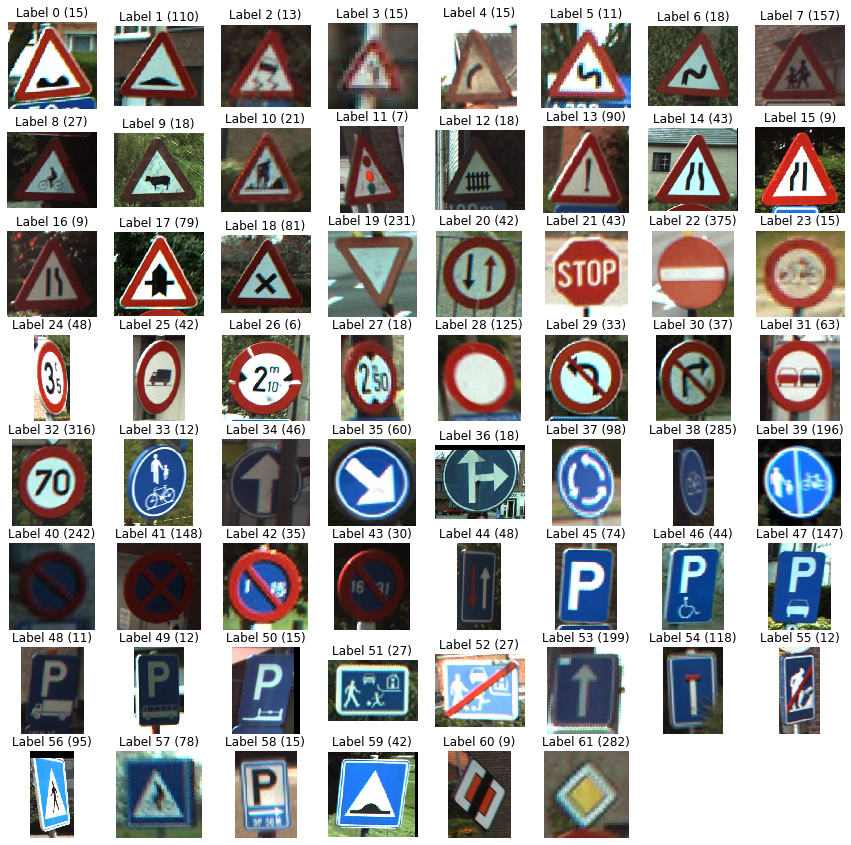

In [17]:
# Get the unique labels 
unique_labels = set(labels)

# Initialize the figure
plt.figure(figsize=(15, 15))

# Set a counter
i = 1

# For each unique label,
for label in unique_labels:
    # You pick the first image for each label
    image = images[labels.index(label)]
    # Define 64 subplots 
    plt.subplot(8, 8, i)
    # Don't include axes
    plt.axis('off')
    # Add a title to each subplot 
    plt.title("Label {0} ({1})".format(label, labels.count(label)))
    # Add 1 to the counter
    i += 1
    # And you plot this first image 
    plt.imshow(image)
    
# Show the plot
plt.show()

In [0]:
# Import the `transform` module from `skimage`
from skimage import transform 

# Rescale the images in the `images` array
images28 = [transform.resize(image, (28, 28)) for image in images]

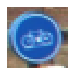

shape: (28, 28, 3), min: 0.043372348939575686, max: 0.9891456582633052


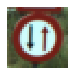

shape: (28, 28, 3), min: 0.08235294117647059, max: 0.9950980392156866


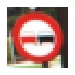

shape: (28, 28, 3), min: 0.11330532212885108, max: 0.996078431372549


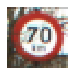

shape: (28, 28, 3), min: 0.10524334733893574, max: 0.996078431372549


In [20]:
# Fill out the subplots with the random images and add shape, min and max values
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images28[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images28[traffic_signs[i]].shape, 
                                                  images28[traffic_signs[i]].min(), 
                                                  images28[traffic_signs[i]].max()))

In [0]:
# Import `rgb2gray` from `skimage.color`
from skimage.color import rgb2gray

# Convert `images28` to an array
images28 = np.array(images28)

# Convert `images28` to grayscale
images28 = rgb2gray(images28)

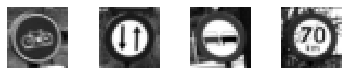

In [22]:
# Convert images to grascale
import matplotlib.pyplot as plt

traffic_signs = [300, 2250, 3650, 4000]

for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images28[traffic_signs[i]], cmap="gray")
    plt.subplots_adjust(wspace=0.5)
    
# Show the plot
plt.show()